## Quick demo of McStasScript input_folder feature
McStas will look for components in the library and the folder from which the simulation is executed. McStasScript has been updated so the simulation can be executed from a specified folder, so components in that folder will overwrite the library components.

Requirements:
* McStas: http://mcstas.org
* McStasScript: pip install mcstasscript

In [1]:
import os
from mcstasscript.interface import instr, functions, plotter

When setting the *input_folder*, McStasScript will let me know which components are overwritten. I have modified the PSD_monitor to multiply the intensity with the x coordinate.

In [2]:
Instr = instr.McStas_instr("demo", input_path="my_input_folder")

The following components are found in the work_directory / input_path:
     PSD_monitor.comp
     Source_simple.comp
These definitions will be used instead of the installed versions.


### Set up quick test instrument

In [3]:
Instr.add_parameter("energy", value=10)

src = Instr.add_component("Source", "Source_simple")
src.xwidth = 0.1
src.yheight = 0.1
src.E0 = "energy"
src.dist = 2.0
src.focus_xw = 0.03
src.focus_yh = 0.03

det = Instr.add_component("Detector", "PSD_monitor")
det.xwidth = 0.03
det.yheight = 0.03
det.filename = "\"psd.dat\""
det.set_AT([0, 0, 2.0], RELATIVE="Source")

### Run the test instrument

INFO: Using directory: "/Users/madsbertelsen/PaNOSC/CodeWorkshop_April_2020/input_folder_demo/output_1"
INFO: Regenerating c-file: demo.c
CFLAGS=
INFO: Recompiling: ./demo.out
INFO: ===
INFO: Placing instr file copy demo.instr in dataset /Users/madsbertelsen/PaNOSC/CodeWorkshop_April_2020/input_folder_demo/output_1

Detector: Detector_I=2.12079e-08 Detector_ERR=1.94755e-07 Detector_N=1e+06 "psd.dat"

number of elements in data list = 1
Plotting data with name Detector


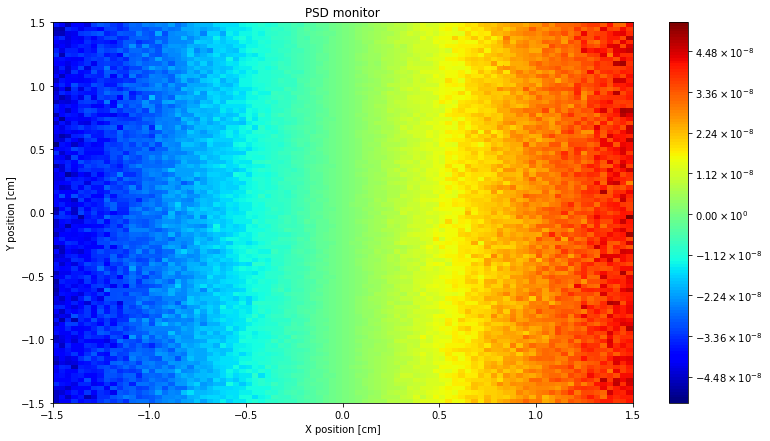

In [4]:
data = Instr.run_full_instrument(foldername="output", increment_folder_name=True)
plotter.make_sub_plot(data)

### Folder contents
Here we show the contents of the current work directory and the chosen input_path folder.

In [5]:
print("Work directory:", os.listdir())
print("Input path:", os.listdir("my_input_folder"))

Work directory: ['my_input_folder', 'output_0', 'output_1', 'output', 'input_path_demo.ipynb', '.ipynb_checkpoints']
Input path: ['demo.out', 'PSD_monitor.comp', 'Source_simple.comp', 'demo.out.dSYM', 'demo.instr', 'demo.c']
